# **Import the libraries**

In [3]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential


# **Data Exploration**


In [5]:
data=pd.read_csv('/content/Churn_Modelling.csv')

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data.isnull().mean()*100

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [10]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [12]:
data.duplicated().sum()

0

In [13]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
data.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)
#inplace=True for geting result permanent in the dataset

In [15]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
data=pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)

In [17]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [18]:

X=data.drop(columns=['Exited'])
y=data['Exited']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)



# Feature Scalling

In [20]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [21]:
X_train_Scale=scale.fit_transform(X_train)
X_test_Scale=scale.fit_transform(X_test)

In [22]:
X_train.shape

(8000, 11)

In [23]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [43]:
history=model.fit(X_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
200/200 [==============================] - 1s 7ms/step - loss: 0.5034 - accuracy: 0.7972 - val_loss: 0.5012 - val_accuracy: 0.7975
Epoch 2/50
200/200 [==============================] - 1s 7ms/step - loss: 0.5034 - accuracy: 0.7972 - val_loss: 0.5013 - val_accuracy: 0.7975
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 0.5033 - accuracy: 0.7972 - val_loss: 0.5014 - val_accuracy: 0.7975
Epoch 4/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5036 - accuracy: 0.7972 - val_loss: 0.5022 - val_accuracy: 0.7975
Epoch 5/50
200/200 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.7972 - val_loss: 0.5022 - val_accuracy: 0.7975
Epoch 6/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5039 - accuracy: 0.7972 - val_loss: 0.5024 - val_accuracy: 0.7975
Epoch 7/50
200/200 [==============================] - 1s 3ms/step - loss: 0.5039 - accuracy: 0.7972 - val_loss: 0.5026 - val_accuracy: 0.7975
Epoch 

In [33]:
model.layers[1].get_weights()

[array([[-0.0404599 , -0.34170213,  0.20820463, -0.14320163,  0.19514108,
         -0.39064234, -0.17614582,  0.0810319 , -0.03742471,  0.1868952 ,
         -0.34229603],
        [-0.22200437, -0.5423195 ,  0.4340782 ,  0.13502854,  0.10781312,
          0.5495305 ,  0.15802075, -0.2627568 , -0.26905388, -0.48938057,
          0.24555044],
        [ 0.45034802, -0.4307559 , -0.36383712,  0.07301529,  0.330289  ,
         -0.20137165,  0.35816312, -0.42788243,  0.29887286, -0.0605493 ,
          0.05933805],
        [ 0.01375758,  0.0796019 ,  0.49383947, -0.29932687,  0.3701864 ,
         -0.10545304, -0.12205351, -0.38100225, -0.21077639,  0.21011627,
         -0.29120433],
        [ 0.40388545,  0.02393629, -0.17934103, -0.15663847,  0.44257116,
         -0.3183046 , -0.0554773 ,  0.26463228, -0.11167298, -0.3670225 ,
         -0.36470422],
        [-0.40961686,  0.215559  , -0.50590146,  0.0043968 ,  0.11669368,
          0.1131562 ,  0.19580448,  0.00314075, -0.31775922,  0.3545531

In [44]:
y_pred=model.predict(X_test_Scale)
y_pred=np.where(y_pred>0.5,1,0)


63/63 [==============================] - 0s 2ms/step


In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,y_pred)

0.7925

In [47]:
history.history

{'loss': [0.5034112334251404,
  0.5033925175666809,
  0.5032925605773926,
  0.5035949349403381,
  0.5039443969726562,
  0.5038554668426514,
  0.5038504600524902,
  0.5041689872741699,
  0.5032213926315308,
  0.503173828125,
  0.5030412077903748,
  0.5029907822608948,
  0.5030399560928345,
  0.5029146075248718,
  0.503284215927124,
  0.503622829914093,
  0.5035946369171143,
  0.5036564469337463,
  0.5036036968231201,
  0.5034981369972229,
  0.503522515296936,
  0.503567099571228,
  0.5034949779510498,
  0.5034410357475281,
  0.5035756826400757,
  0.5035211443901062,
  0.5034745335578918,
  0.5034377574920654,
  0.5035272836685181,
  0.5035125017166138,
  0.5034021139144897,
  0.5039847493171692,
  0.5038416385650635,
  0.50424724817276,
  0.5059705972671509,
  0.503776490688324,
  0.4974605143070221,
  0.49729669094085693,
  0.4971153140068054,
  0.4971926212310791,
  0.4970950186252594,
  0.49699392914772034,
  0.4969295859336853,
  0.4970245659351349,
  0.49695885181427,
  0.496913105

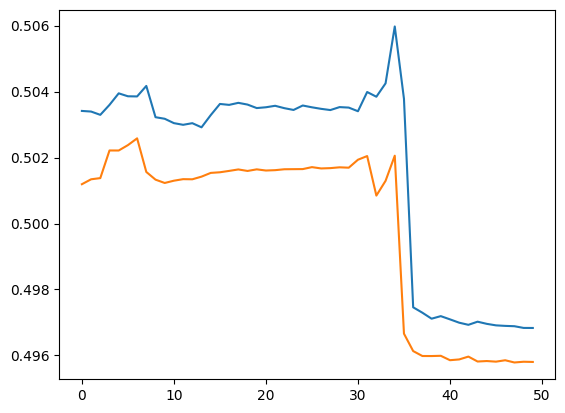

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
